Sucesso ao ler 1_Row_Opposing.csv: 2702 linhas.
Sucesso ao ler 2_Rows_Opposing.csv: 2702 linhas.
Sucesso ao ler Random_100.csv: 2702 linhas.


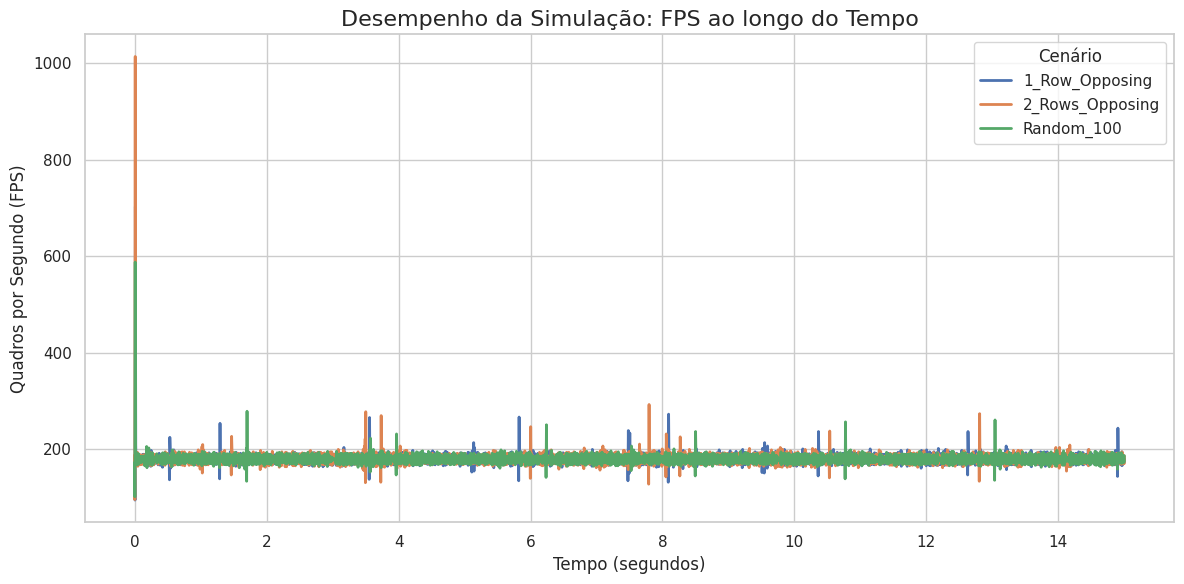

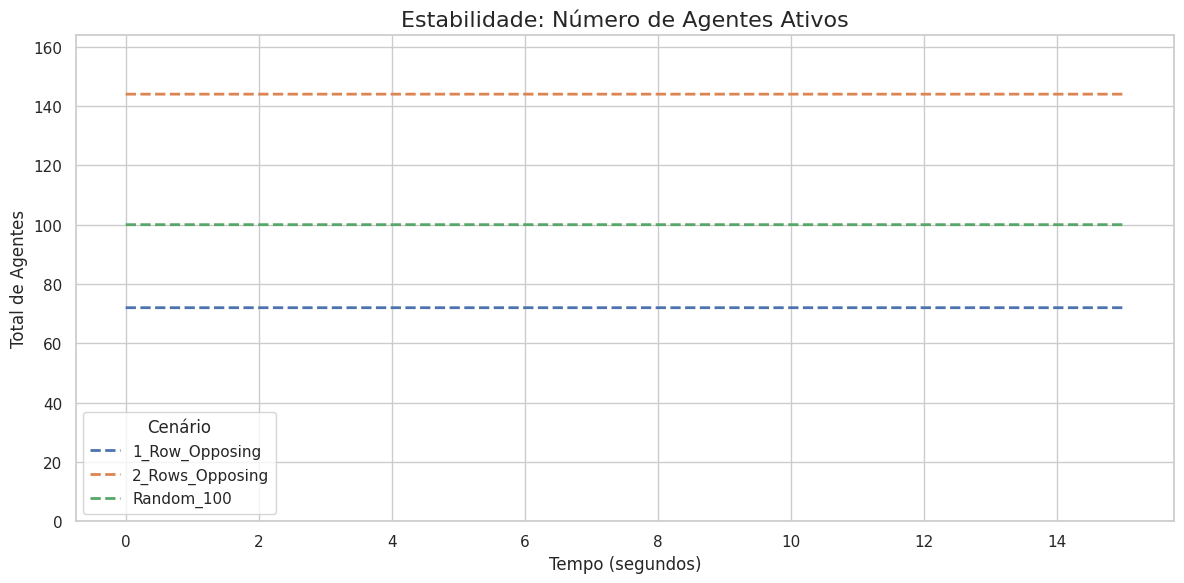

/tmp/ipython-input-2682370761.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=all_data, x='Scenario', y='FPS', palette="Set2")


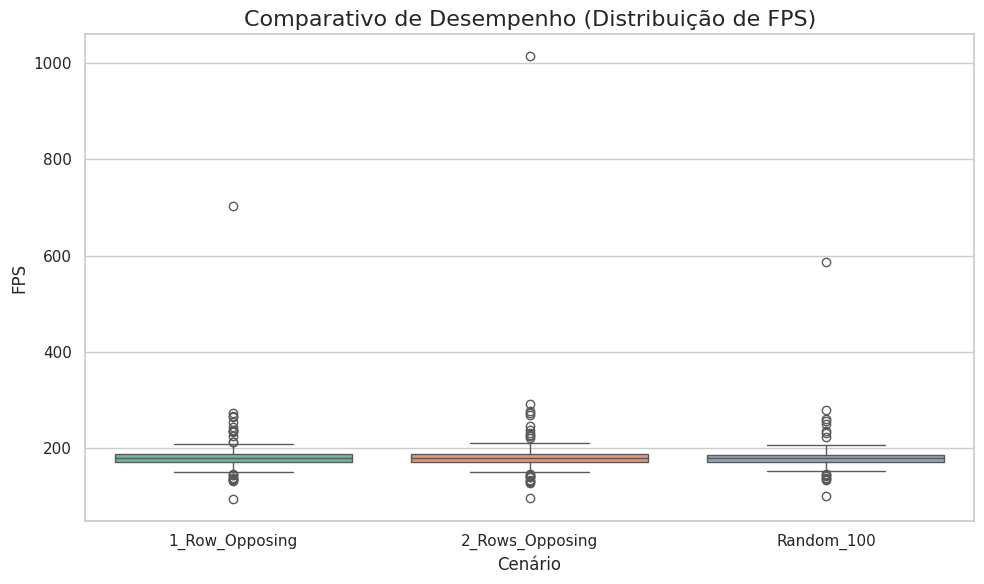


=== Resumo Estatístico (Média de FPS) ===
                       mean    min     max        std
Scenario                                             
1_Row_Opposing   180.231680   95.0   703.0  14.410507
2_Rows_Opposing  180.351221   96.0  1014.0  19.186199
Random_100       180.100666  102.0   588.0  12.398311


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

# Configuração dos arquivos
files = {
    "1_Row_Opposing": "1_Row_Opposing.csv",
    "2_Rows_Opposing": "2_Rows_Opposing.csv",
    "Random_100": "Random_100.csv"
}

dfs = []

# Leitura dos dados
for name, filename in files.items():
    try:
        # Lê o CSV sem cabeçalho (header=None) e nomeia as colunas manualmente
        df = pd.read_csv(filename, header=None, names=['Test', 'Time', 'FPS', 'Agents'])
        df['Scenario'] = name # Adiciona coluna para identificar o cenário no gráfico
        dfs.append(df)
        print(f"Sucesso ao ler {filename}: {len(df)} linhas.")
    except FileNotFoundError:
        print(f"ERRO: Arquivo {filename} não encontrado. Faça o upload primeiro!")

if dfs:
    all_data = pd.concat(dfs, ignore_index=True)

    # Configura o estilo visual dos gráficos
    sns.set_theme(style="whitegrid")

    # --- GRÁFICO 1: FPS ao Longo do Tempo ---
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=all_data, x='Time', y='FPS', hue='Scenario', linewidth=2)
    plt.title('Desempenho da Simulação: FPS ao longo do Tempo', fontsize=16)
    plt.xlabel('Tempo (segundos)', fontsize=12)
    plt.ylabel('Quadros por Segundo (FPS)', fontsize=12)
    plt.legend(title='Cenário')
    plt.tight_layout()
    plt.show()

    # --- GRÁFICO 2: Contagem de Agentes (Estabilidade) ---
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=all_data, x='Time', y='Agents', hue='Scenario', linewidth=2, linestyle='--')
    plt.title('Estabilidade: Número de Agentes Ativos', fontsize=16)
    plt.xlabel('Tempo (segundos)', fontsize=12)
    plt.ylabel('Total de Agentes', fontsize=12)
    plt.ylim(0, max(all_data['Agents']) + 20) # Margem no topo
    plt.legend(title='Cenário')
    plt.tight_layout()
    plt.show()

    # --- GRÁFICO 3: Distribuição de FPS (Comparação de Carga) ---
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=all_data, x='Scenario', y='FPS', palette="Set2")
    plt.title('Comparativo de Desempenho (Distribuição de FPS)', fontsize=16)
    plt.ylabel('FPS', fontsize=12)
    plt.xlabel('Cenário', fontsize=12)
    plt.tight_layout()
    plt.show()

    # --- Análise Estatística Simples ---
    print("\n=== Resumo Estatístico (Média de FPS) ===")
    print(all_data.groupby('Scenario')['FPS'].describe()[['mean', 'min', 'max', 'std']])

else:
    print("Nenhum dado para gerar gráficos.")